<a href="https://colab.research.google.com/github/hmazomba/FinMan/blob/notebooks/Backtester.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install backtrader

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [4, 2.5]
plt.rcParams['figure.dpi'] = 400
warnings.simplefilter(action='ignore', category=FutureWarning)

# **Simple Moving Average Signal**


In [ ]:
from datetime import datetime 
import backtrader as bt

In [ ]:
class SmaSignal(bt.Signal):
  params = (('period', 20), )
  
  def __init___(self):
    self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

In [ ]:
data = bt.feeds.YahooFinanceData(dataname='AAPL',
                               fromdate=datetime(2018, 1, 1),
                               todate=datetime(2018, 12, 31))

In [ ]:
class MyBuySell(bt.observers.BuySell):
  plotlines = dict(
      buy=dict(marker='^', markersize=8.0, color='blue', fillstyle='full'),
      sell=dict(marker='v', markersize=8.0, color='red', fillstyle='full')
  )


In [ ]:
class SmaSignal(bt.Signal):
  params = (('period', 20), )

  def __init__(self):
    self.lines.signal = self.data - bt.ind.SMA(period=self.p.period)

Starting Portfolio Value: 1000.00
Final Starting Portfolio Value: 1011.49


<IPython.core.display.Javascript object>

[[<Figure size 1600x1000 with 3 Axes>]]

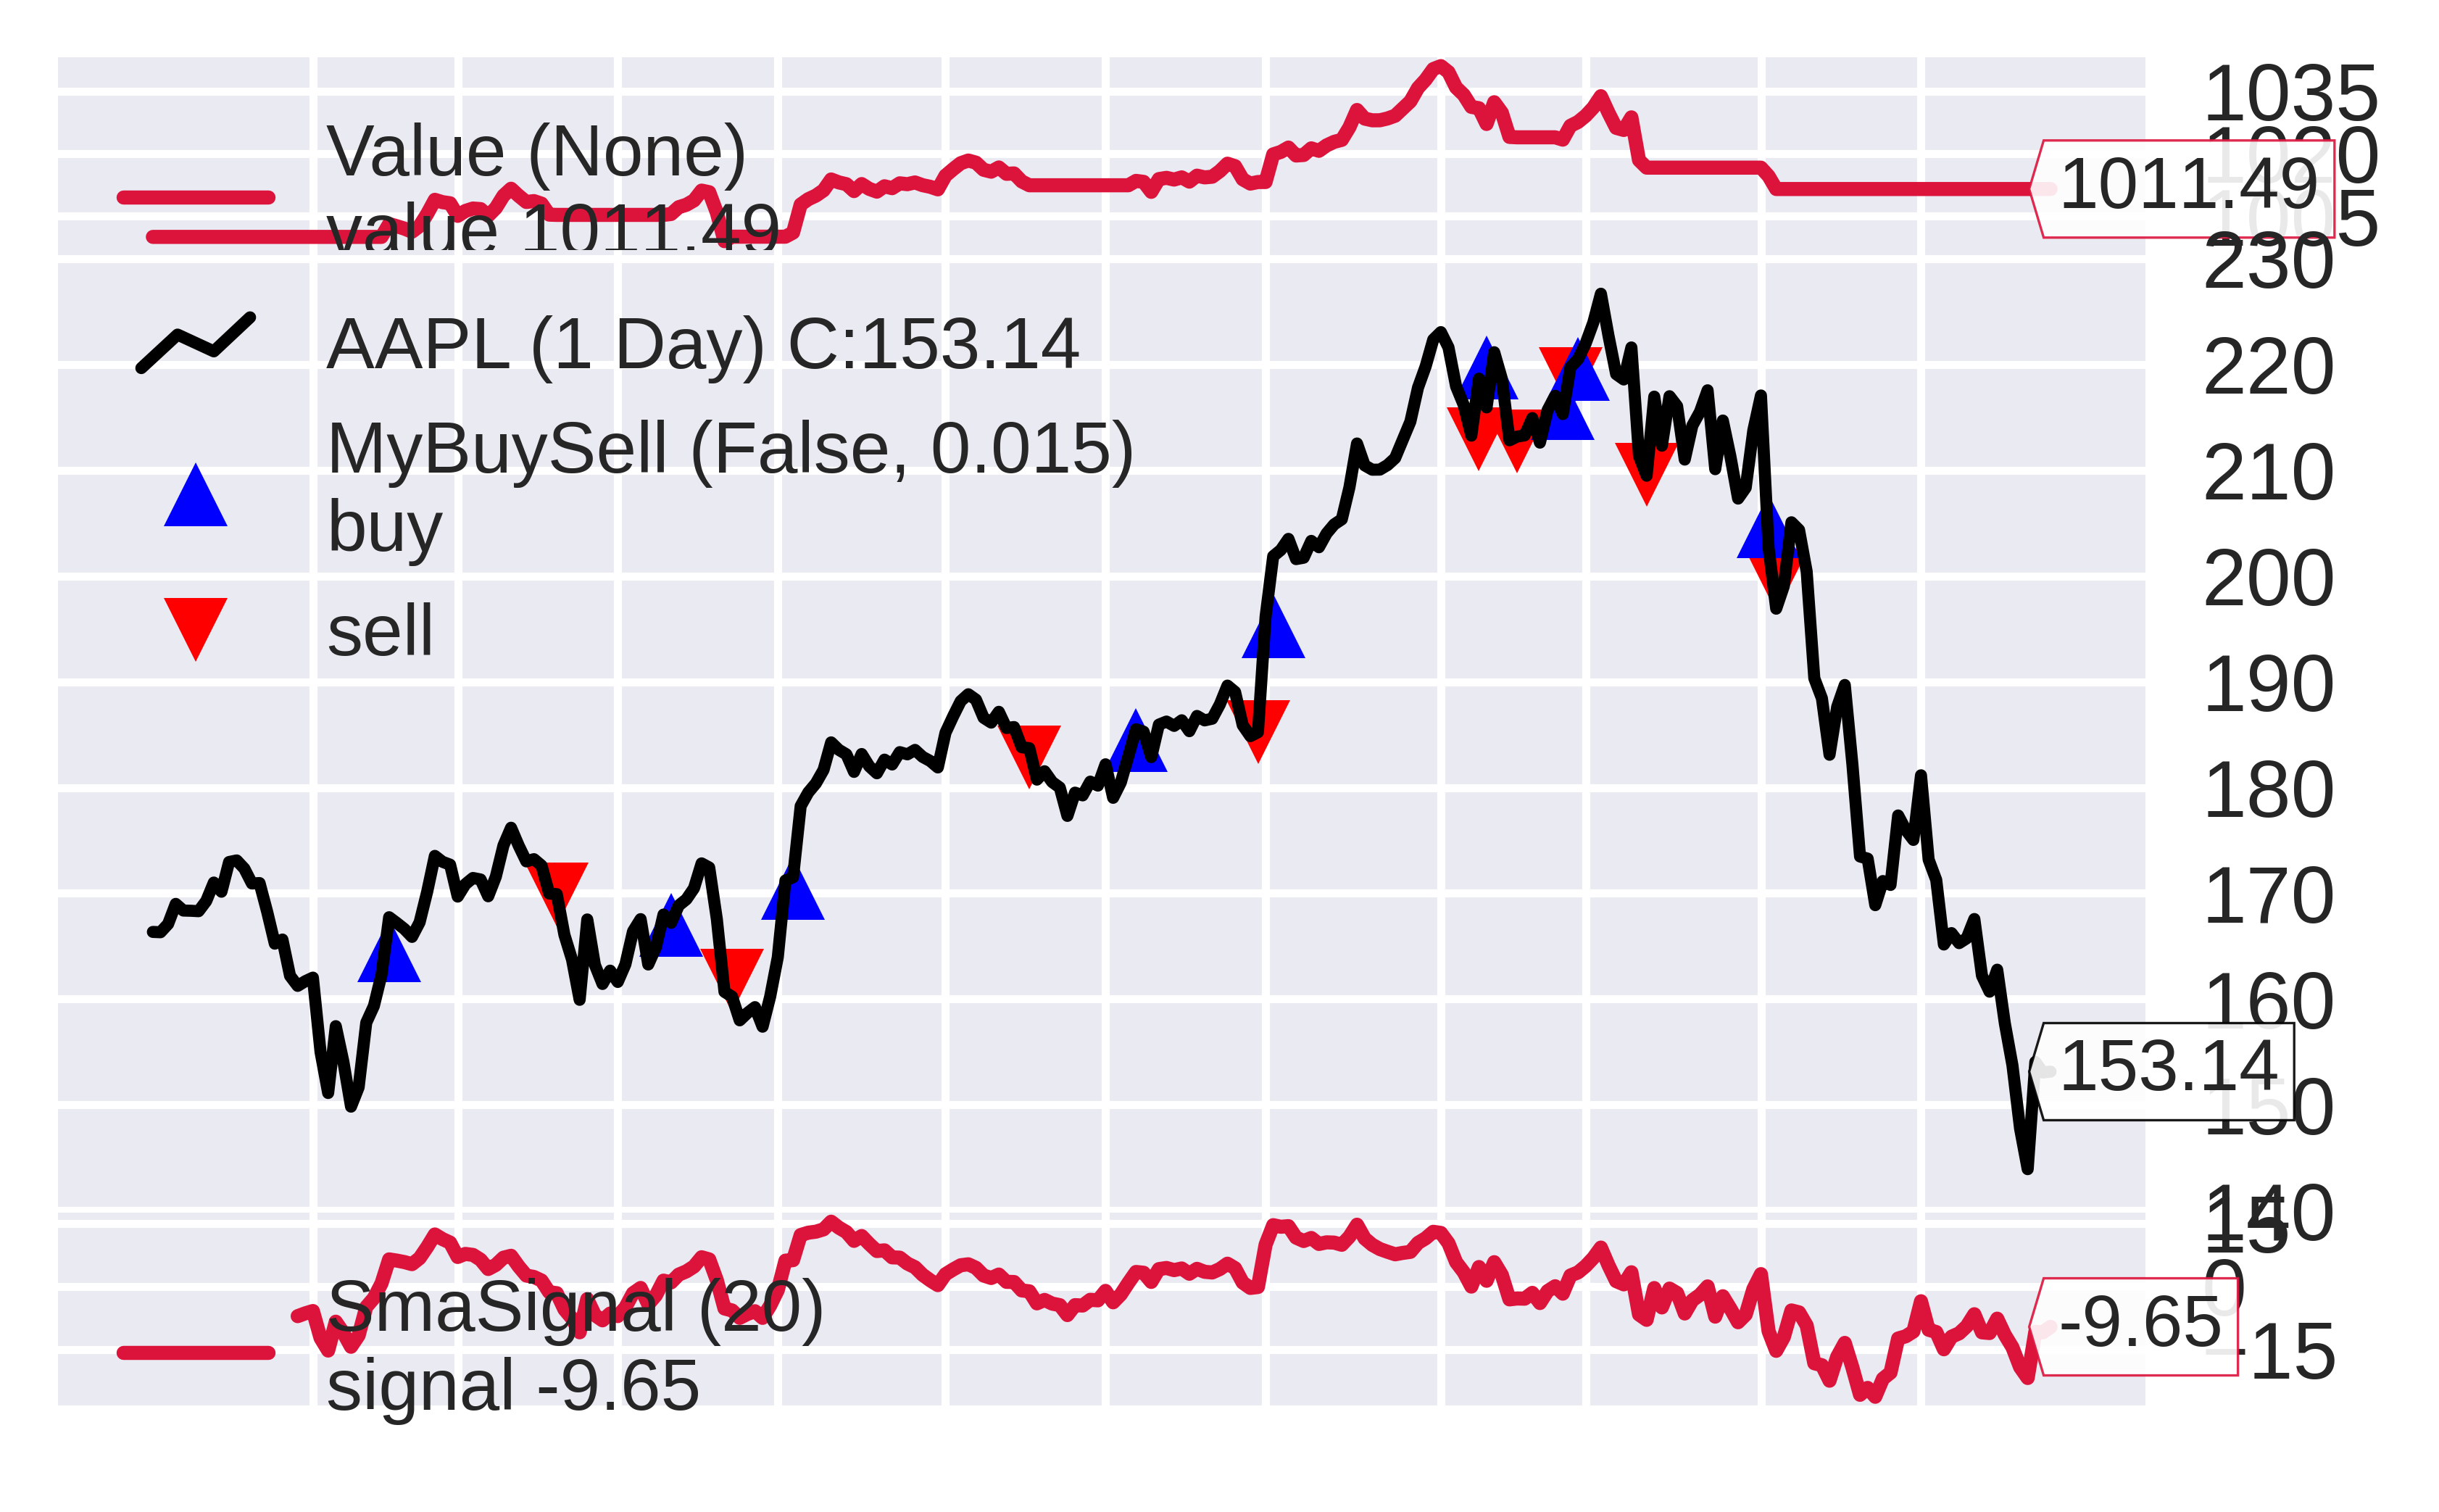

In [ ]:
cerebro = bt.Cerebro(stdstats = False)

cerebro.adddata(data)
cerebro.broker.setcash(1000.0)
cerebro.add_signal(bt.SIGNAL_LONG, SmaSignal)
cerebro.addobserver(MyBuySell)
cerebro.addobserver(bt.observers.Value)

print(f'Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')
x = cerebro.run()
print(f'Final Starting Portfolio Value: {cerebro.broker.getvalue():.2f}')

cerebro.plot(iplot=True, volume=False)

# **Simple Moving Average Strategy**



In [ ]:
class SmaStretegy(bt.Strategy):
  params = (('ma_period', 20), )

  def __init__(self):
    #keep track of close price in the series
    self.data_close = self.datas[0].close

    #keep track of pending orders/buy price/buy commission
    self.order = None
    self.price = None
    self.comm = None

